In [1]:
import sys
sys.path.append('../')

import tensorflow as tf
import graphgallery 
import matplotlib.pyplot as plt


# Set if memory growth should be enabled for ALL `PhysicalDevice`.
graphgallery.set_memory_growth()

2 Physical GPUs, 2 Logical GPUs


In [2]:
tf.__version__

'2.1.0'

In [3]:
graphgallery.__version__

'0.1.10'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [4]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', verbose=False)
adj = data.adj
x = data.x
labels = data.labels
idx_train = data.idx_train
idx_val = data.idx_val
idx_test = data.idx_test


Downloaded dataset files have existed.
Processed dataset files have existed.


In [5]:
data.supported_datasets

('citeseer', 'cora', 'pubmed')

# RobustGCN model
+ adj: Scipy sparse matrix
+ x: Numpy array-like matrix
+ labels: Numpy array
+ device: can be "CPU" or "GPU"
+ norm_x: `l1` for row-wise normalize for input `x`


In [6]:
from graphgallery.nn.models import RobustGCN
model = RobustGCN(adj, x, labels, device='GPU', norm_x='l1', seed=123)
model.build()
# train with validation
his = model.train(idx_train, idx_val, verbose=1, epochs=200)
# train without validation
# his = model.train(idx_train, verbose=1, epochs=100)
loss, accuracy = model.test(idx_test)
print(f'Test loss {loss:.5}, Test accuracy {accuracy:.2%}')


<Loss = 1.4771 Acc = 1.0000 Val_Loss = 2.0769 Val_Acc = 0.7960 >: 100%|██████████| 200/200 [00:07<00:00, 26.51it/s]


Test loss 2.1962, Test accuracy 82.90%


## Show model summary

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
features (InputLayer)           [(None, 1433)]       0                                            
__________________________________________________________________________________________________
adj_matrix_1 (InputLayer)       [(None, None)]       0                                            
__________________________________________________________________________________________________
adj_matrix_2 (InputLayer)       [(None, None)]       0                                            
__________________________________________________________________________________________________
gaussion_convolution_f (Gaussio ((None, 64), (None,  91712       features[0][0]                   
                                                                 adj_matrix_1[0][0]           

## Show parameters 

In [8]:
# show training parameters
model.show('train')

+-------------------+----------------------------------+
|    Parameters     |              Value               |
+===================+==================================+
| Name              | RobustGCN                        |
+-------------------+----------------------------------+
| as_model          | False                            |
+-------------------+----------------------------------+
| callbacks         | None                             |
+-------------------+----------------------------------+
| early_stop_metric | val_loss                         |
+-------------------+----------------------------------+
| early_stopping    | None                             |
+-------------------+----------------------------------+
| epochs            | 200                              |
+-------------------+----------------------------------+
| kwargs            | {}                               |
+-------------------+----------------------------------+
| monitor           | val_acc  

In [9]:
# show model parameters
model.show('model')

+-------------+-----------+
| Parameters  |   Value   |
+=============+===========+
| Name        | RobustGCN |
+-------------+-----------+
| activations | ['relu']  |
+-------------+-----------+
| dropouts    | [0.5]     |
+-------------+-----------+
| gamma       | 1         |
+-------------+-----------+
| hiddens     | [64]      |
+-------------+-----------+
| kl          | 0.001     |
+-------------+-----------+
| l2_norms    | [0.0005]  |
+-------------+-----------+
| lr          | 0.010     |
+-------------+-----------+
| use_bias    | False     |
+-------------+-----------+


In [10]:
# By defaule, show all
model.show()

+-------------------+----------------------------------+
|    Parameters     |              Value               |
+===================+==================================+
| Name              | RobustGCN                        |
+-------------------+----------------------------------+
| activations       | ['relu']                         |
+-------------------+----------------------------------+
| as_model          | False                            |
+-------------------+----------------------------------+
| callbacks         | None                             |
+-------------------+----------------------------------+
| device            | GPU                              |
+-------------------+----------------------------------+
| dropouts          | [0.5]                            |
+-------------------+----------------------------------+
| early_stop_metric | val_loss                         |
+-------------------+----------------------------------+
| early_stopping    | None     

## Visualization Training 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


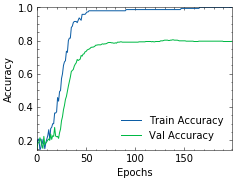

In [11]:
# NOTE: you must install SciencePlots package for a better preview.
with plt.style.context(['science', 'no-latex']):
    plt.plot(his.history['acc'])
    plt.plot(his.history['val_acc'])
    plt.legend(['Train Accuracy', 'Val Accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.autoscale(tight=True)
    plt.show()    

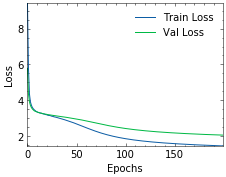

In [12]:
# NOTE: you must install SciencePlots package for a better preview.
with plt.style.context(['science', 'no-latex']):
    plt.plot(his.history['loss'])
    plt.plot(his.history['val_loss'])
    plt.legend(['Train Loss', 'Val Loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.autoscale(tight=True)
    plt.show()    